### Task 1: Question 6

Final Weight Vector:
[[-1.87083880e-05]
 [ 1.49391516e-02]
 [ 7.48127071e-03]]

Final Cost:
0.683859580019204


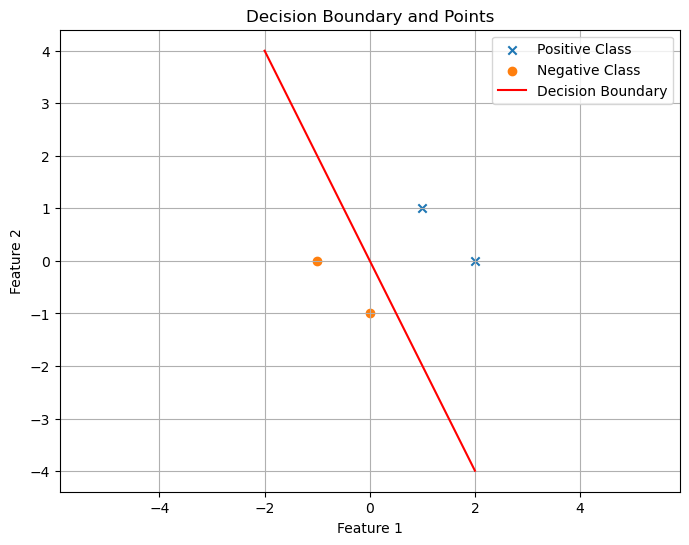

In [12]:
''' Execute multivariable logistic regression through
 the utilization of the Matrix-Vector Multiplication approach with Gradient Descent.
'''

import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (cross-entropy loss)
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    J = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return J

# Gradient of the cost function
def gradient(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    grad = 1/m * np.dot(X.T, (h - y))
    return grad

# Gradient descent function
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    costs = []
    for _ in range(num_iterations):
        theta -= learning_rate * gradient(X, y, theta)
        costs.append(cost_function(X, y, theta))
    return theta, costs

# Input data
X = np.array([[1, 1, 1], [1, 2, 0], [1, -1, 0], [1, 0, -1]], dtype=np.float64)
y = np.array([[1], [1], [0], [0]], dtype=np.float64)
theta = np.array([[0], [0], [0]], dtype=np.float64)  
learning_rate = 0.01
num_iterations = 3

# Perform gradient descent
theta_final, costs = gradient_descent(X, y, theta, learning_rate, num_iterations)

# Print the final weight vector and costs
print("Final Weight Vector:")
print(theta_final)
print("\nFinal Cost:")
print(costs[-1])


# Plot points
plt.figure(figsize=(8, 6))
plt.scatter(X[y.flatten()==1, 1], X[y.flatten()==1, 2], marker='x', label='Positive Class')
plt.scatter(X[y.flatten()==0, 1], X[y.flatten()==0, 2], marker='o', label='Negative Class')

# Plot decision boundary
x_decision = np.linspace(-2, 2, 100)
y_decision = (-1/theta_final[2]) * (theta_final[1]*x_decision + theta_final[0])
plt.plot(x_decision, y_decision, color='red', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Points')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


### Task 2: Question 7

In [13]:
''' Execute regularization through the utilization of the
Matrix-Vector Multiplication approach with Gradient Descent
'''

import numpy as np

x = np.array([[1],[2],[3],[4]]) # feature 1
x2 = np.square(x)   # feature 2
x3 = np.power(x,3) # feature 3
y = np.array([[1],[3.5],[9.5],[15]])    # labels
theta = np.array([[0.0], [0.0], [0.0], [0.0]])  # initialize parameters
regularization_params = [0.5, 50]  # regularization parameters to try
N = 2  # number of iterations
learning_rate = 0.1

def normalize(x, x2, x3):
    x_mean, x_std = np.mean(x), np.std(x)
    x2_mean, x2_std = np.mean(x2), np.std(x2)
    x3_mean, x3_std = np.mean(x3), np.std(x3)

    # Normalize each array
    x_normalized = (x - x_mean) / x_std         # new feature 1 after normalizing
    x2_normalized = (x2 - x2_mean) / x2_std   # new feature 2 after normalizing
    x3_normalized = (x3 - x3_mean) / x3_std    # new feature 3 after normalizing

    return x_normalized, x2_normalized, x3_normalized

def add_bias_feature(x):
    return np.hstack((np.ones((x.shape[0], 1)), x))

def hypothesis(theta, x):
    return np.dot(x, theta)

def cost_function(theta, x, y, regularization_param):
    m = len(y)
    h = hypothesis(theta, x)
    reg_term = (regularization_param / (2 * m)) * np.sum(np.square(theta[1:]))
    return (1 / (2 * m)) * np.sum(np.square(h - y)) + reg_term

def gradient_descent(theta, x, y, regularization_param, learning_rate, N):
    m = len(y)
    cost_history = []

    for _ in range(N):
        h = hypothesis(theta, x)
        theta -= (learning_rate / m) * (np.dot(x.T, (h - y)) + regularization_param * theta)
        cost = cost_function(theta, x, y, regularization_param)
        cost_history.append(cost)

    return theta, cost_history

for regularization_param in regularization_params:
    print(f"Regularization parameter: {regularization_param}")
    # Normalize features
    x_normalized, x2_normalized, x3_normalized = normalize(x, x2, x3)

    # Add bias feature
    x_bias = add_bias_feature(np.column_stack((x_normalized, x2_normalized, x3_normalized)))

    # Perform gradient descent
    theta_final, cost_history = gradient_descent(theta, x_bias, y, regularization_param, learning_rate, N)

    print("Final parameters:")
    print(theta_final)

    print("Cost history:")
    print(cost_history)
    print("\n")


Regularization parameter: 0.5
Final parameters:
[[1.3684375 ]
 [0.90899164]
 [0.91648101]
 [0.900107  ]]
Cost history:
[28.752884018241584, 21.253832696654484]


Regularization parameter: 50
Final parameters:
[[0.63888359]
 [0.51377406]
 [0.51858617]
 [0.51010111]]
Cost history:
[38.679117132914875, 34.48101051422318]




### Task 3 : Question 8


In [11]:
'''Implement one VS ALL (multi-class) classification
in machine learning
'''


import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (cross-entropy loss)
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    J = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return J

# Gradient of the cost function
def gradient(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    grad = 1/m * np.dot(X.T, (h - y))
    return grad

# Gradient descent function
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    costs = []
    for _ in range(num_iterations):
        theta -= learning_rate * gradient(X, y, theta)
        costs.append(cost_function(X, y, theta))
    return theta, costs

# One-vs-all classification
def one_vs_all(X, y, num_classes, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    classifiers = {}
    
    # Train a binary classifier for each class
    for class_label in range(1, num_classes + 1):
        # Create binary labels for the current class vs. rest
        binary_labels = np.where(y == class_label, 1, 0)
        
        # Initialize parameters
        theta = np.zeros((num_features,1))
        
        # Perform gradient descent
        theta, _ = gradient_descent(X, binary_labels, theta, learning_rate, num_iterations)
        
        # Store the trained parameters in the dictionary
        classifiers[class_label] = theta
    
    return classifiers

# Input data
X = np.array([[-2, 3], [-2, 4], [-1, 3], [3, 3], [4, 4], [4, 3],[-1,-1],[-2,0],[-3,-2]], dtype=np.float64)
y = np.array([[1],[1],[1],[2],[2],[2],[3],[3],[3]],dtype=np.float64)
num_classes = len(np.unique(y))
learning_rate = 0.01
num_iterations = 1000

# Perform one-vs-all classification
classifiers = one_vs_all(X, y, num_classes, learning_rate, num_iterations)

# Predict probabilities for each class using all classifiers
probabilities = np.zeros((len(X), num_classes))
for i, theta in classifiers.items():
    probabilities[:, i-1] = sigmoid(np.dot(X, theta).flatten())  # Probability of positive class

# Predict the class with the highest probability
predictions = np.argmax(probabilities, axis=1) + 1  # Add 1 to convert back to original class labels

# Print the predictions
print("Predictions:", predictions)


Predictions: [1 1 1 2 2 2 3 3 3]
